In [1]:
# ls

In [35]:
# Parameters
INPUT_FILE = 'pair_selection_with_tier.csv'
MAX_ORDER = 10
SCORE_LIST = [13,8,5,3,2,1,1,1,1,1]

assert len(SCORE_LIST) == MAX_ORDER

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

In [55]:
def replace_nan(data):
    """Replace NaN Value
        If a column contains numerical value, replace it with 0.
        Otherwise, replace it with 'UNKNOWN'"""
    
    df = data.copy()
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            df[col].fillna(0, inplace = True)
        else:
            df[col].fillna('UNKNOWN', inplace = True)
    return df

def tier_multiply(score, tier):
    """Multiply scores of each candidate by his/her respective tier
    """
    new = score.copy()
    new['tier'] = tier
    new = new.apply(lambda x: x * x['tier'])
    return new

In [45]:
pre_df = pd.read_csv(INPUT_FILE)
tier = pre_df.pop('tier')
tier.index = pre_df.ID
tier.head()

ID
6230124521    4
6031843521    2
6030274221    4
6031779021    4
6030826721    1
Name: tier, dtype: int64

# Data Preprocessing

In [52]:
df = replace_nan(pre_df)

In [53]:
score_transform = {k: v for k, v in zip(range(1, MAX_ORDER + 1), SCORE_LIST)}
df.replace(score_transform, inplace = True)
df.head()

,ID,pair 1,pair 2,pair 3,pair 4,pair 5,pair 6,pair 7,pair 8,pair 9,pair 10,pair 11,pair 12,pair 13,pair 14,pair 15,pair 16,pair 17,pair 18
0,6230124521,5.0,8.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,13.0,1.0
1,6031843521,0.0,0.0,5.0,0.0,0.0,1.0,2.0,8.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,13.0,3.0,1.0
2,6030274221,0.0,1.0,13.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,5.0,0.0,0.0,8.0,0.0,1.0,3.0
3,6031779021,3.0,0.0,8.0,0.0,0.0,0.0,0.0,13.0,2.0,1.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,1.0
4,6030826721,1.0,13.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,8.0,0.0,1.0,0.0,5.0,1.0


# Multiply Tier

In [59]:
df_tier = df.set_index('ID')
df_tier['tier'] = tier
df_tier.head()

,pair 1,pair 2,pair 3,pair 4,pair 5,pair 6,pair 7,pair 8,pair 9,pair 10,pair 11,pair 12,pair 13,pair 14,pair 15,pair 16,pair 17,pair 18,tier
ID,,,,,,,,,,,,,,,,,,,
6230124521,5.0,8.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,13.0,1.0,4
6031843521,0.0,0.0,5.0,0.0,0.0,1.0,2.0,8.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,13.0,3.0,1.0,2
6030274221,0.0,1.0,13.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,5.0,0.0,0.0,8.0,0.0,1.0,3.0,4
6031779021,3.0,0.0,8.0,0.0,0.0,0.0,0.0,13.0,2.0,1.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,1.0,4
6030826721,1.0,13.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,8.0,0.0,1.0,0.0,5.0,1.0,1


In [62]:
for candidate in df_tier.index:
    tier_score = df_tier.loc[candidate, 'tier']
    df_tier.loc[candidate] = df_tier.loc[candidate].apply(lambda x: x * tier_score)

In [64]:
df_tier.drop('tier', axis = 1, inplace = True)
df_tier.head()

,pair 1,pair 2,pair 3,pair 4,pair 5,pair 6,pair 7,pair 8,pair 9,pair 10,pair 11,pair 12,pair 13,pair 14,pair 15,pair 16,pair 17,pair 18
ID,,,,,,,,,,,,,,,,,,
6230124521,20.0,32.0,0.0,0.0,12.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,0.0,8.0,0.0,52.0,4.0
6031843521,0.0,0.0,10.0,0.0,0.0,2.0,4.0,16.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,26.0,6.0,2.0
6030274221,0.0,4.0,52.0,0.0,4.0,4.0,0.0,8.0,0.0,4.0,0.0,20.0,0.0,0.0,32.0,0.0,4.0,12.0
6031779021,12.0,0.0,32.0,0.0,0.0,0.0,0.0,52.0,8.0,4.0,0.0,20.0,0.0,0.0,4.0,4.0,4.0,4.0
6030826721,1.0,13.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,8.0,0.0,1.0,0.0,5.0,1.0


In [65]:
# Let df = df_tier (for scripts below)
df = df_tier

# Correlation Matrix

In [66]:
pair_score = df[[col for col in df if 'pair' in col]]
corr = pair_score.corr()
corr_table = corr.unstack().reset_index(name = 'Value')
corr_table.columns = ['#1', '#2', 'Value']
corr_table.head()

,#1,#2,Value
0,pair 1,pair 1,1.000000
1,pair 1,pair 2,-0.098753
2,pair 1,pair 3,0.114881
3,pair 1,pair 4,-0.060706
4,pair 1,pair 5,0.078782


# Dendrogram

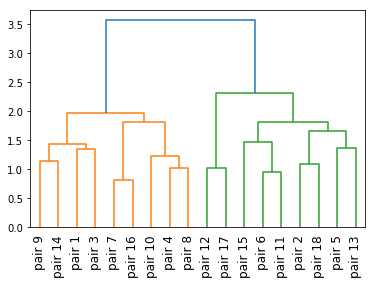

In [67]:
den = hierarchy.dendrogram(hierarchy.linkage(corr, method = 'ward'),
                           labels = corr.index,
                           leaf_rotation=90)

In [68]:
# Final data to put into those unsupervised learning models
pair_score.head()

,pair 1,pair 2,pair 3,pair 4,pair 5,pair 6,pair 7,pair 8,pair 9,pair 10,pair 11,pair 12,pair 13,pair 14,pair 15,pair 16,pair 17,pair 18
ID,,,,,,,,,,,,,,,,,,
6230124521,20.0,32.0,0.0,0.0,12.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,0.0,8.0,0.0,52.0,4.0
6031843521,0.0,0.0,10.0,0.0,0.0,2.0,4.0,16.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,26.0,6.0,2.0
6030274221,0.0,4.0,52.0,0.0,4.0,4.0,0.0,8.0,0.0,4.0,0.0,20.0,0.0,0.0,32.0,0.0,4.0,12.0
6031779021,12.0,0.0,32.0,0.0,0.0,0.0,0.0,52.0,8.0,4.0,0.0,20.0,0.0,0.0,4.0,4.0,4.0,4.0
6030826721,1.0,13.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,8.0,0.0,1.0,0.0,5.0,1.0


# Principal Component Analysis

In [69]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(n_components=2).fit(pair_score.T)

In [71]:
pca_score = pca.transform(pair_score.T)

# Explained variance ratio
pca.explained_variance_ratio_

array([0.22108338, 0.15295491])

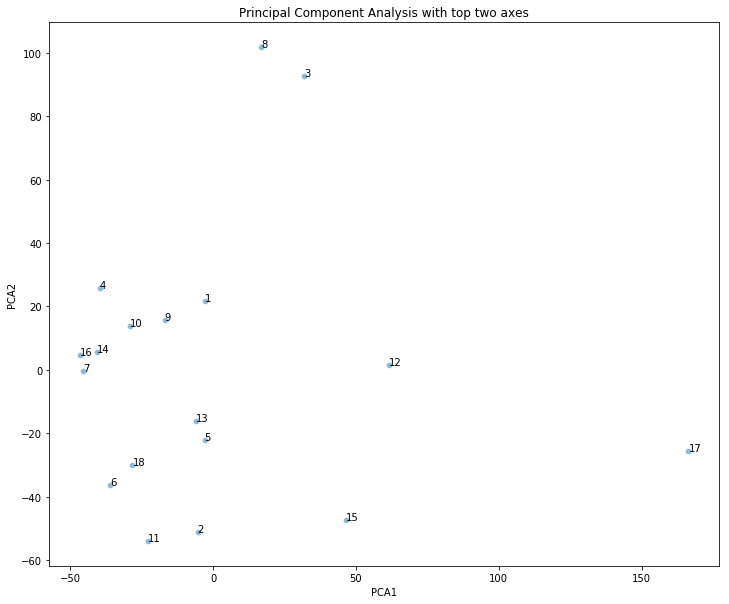

In [72]:
plt.figure(figsize = (12,10))
#plt.scatter(pca_score[:,0], pca_score[:,1])
sns.scatterplot(pca_score[:,0], pca_score[:,1], alpha = 0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Principal Component Analysis with top two axes')

# Annotate label for each dot
for i in range(pca_score.shape[0]):
    plt.annotate(str(i+1), (pca_score[i,0], pca_score[i,1]))

plt.show()

# Truncated Singular Value Decomposition

In [73]:
from sklearn.decomposition import TruncatedSVD

In [74]:
tsvd = TruncatedSVD(n_components=2, random_state=73).fit(pair_score.T)
tsvd_score = tsvd.transform(pair_score.T)

tsvd.explained_variance_ratio_

array([0.16537476, 0.15505945])

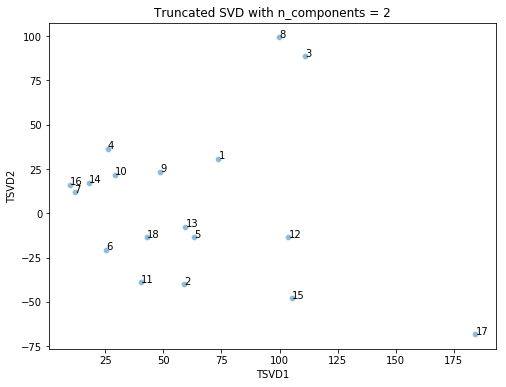

In [75]:
plt.figure(figsize = (8,6))
#plt.scatter(pca_score[:,0], pca_score[:,1])
sns.scatterplot(tsvd_score[:,0], tsvd_score[:,1], alpha = 0.5)
plt.xlabel('TSVD1')
plt.ylabel('TSVD2')
plt.title('Truncated SVD with n_components = 2')

# Annotate label for each dot
for i in range(tsvd_score.shape[0]):
    plt.annotate(str(i+1), (tsvd_score[i,0], tsvd_score[i,1]))

plt.show()

# Extra: Pair Score Sum

In [76]:
df.sum(axis = 0).iloc[1:].astype(int).sort_values(ascending = False)

pair 17    1544
pair 3     1054
pair 15    1044
pair 8      951
pair 12     928
pair 5      654
pair 13     650
pair 2      632
pair 9      528
pair 18     515
pair 11     485
pair 6      334
pair 10     325
pair 4      291
pair 14     251
pair 7      169
pair 16     152
dtype: int64

# 3D Plot from PCA

In [77]:
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [78]:
pca_3x = PCA(n_components=3).fit(pair_score.T)
pca_3x_score = pca_3x.transform(pair_score.T)

print('Explained variance ratio: %.2f' % (sum(pca_3x.explained_variance_ratio_) * 100))

Explained variance ratio: 47.49


In [79]:
plt.figure(figsize = (10,10))
fig = px.scatter_3d(x = pca_3x_score[:, 0], y = pca_3x_score[:, 1],
                    z = pca_3x_score[:, 2], text = [str(i+1) for i in range(18)],
                    opacity = 0.3, title = '3D Principal Component Analysis Visualization')

fig.update_layout(scene = dict(xaxis = dict(showgrid = False, showticklabels = False),
                               yaxis = dict(showgrid = False, showticklabels = False),
                               zaxis = dict(showgrid = False, showticklabels = False)))
fig.show()

<Figure size 720x720 with 0 Axes>

In [33]:
pca_3rd = pca_3x_score[:, 2]
pca_3rd_scale = MinMaxScaler().fit_transform(pca_3rd.reshape(1, -1))
pca_3rd_scale

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [34]:
pca_3rd

array([ 17.47868479, -14.39490922,  19.04852118,  -6.71529511,
         5.67250085,  -0.35353556,  -2.89505181, -16.91564313,
         1.27040988,  -4.07335231,   6.9178253 ,  -0.51415465,
        -1.22833269,  -0.81154768,  22.5403033 ,  -6.9424234 ,
       -12.72711699,  -5.35688276])